In [1]:
import pandas as pd

fetal_health = pd.read_csv('fetal_health.csv')

In [3]:

print(fetal_health.columns)

## See class balance
print(pd.value_counts(fetal_health.fetal_health))
##More 1s than anything else


Index(['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency',
       'fetal_health'],
      dtype='object')
1.0    1655
2.0     295
3.0     176
Name: fetal_health, dtype: int64


In [7]:
## Look at data format, evaluate missing values. 
for col in fetal_health.columns:
    print('')
    print("######Values for "+col)
    print(pd.value_counts(fetal_health[col]))
    
## Looks like all our data are numeric (except for histogram tendency). Some are count, and some seem continuous
## There are no numbers like -999 with an unnatural frequency (just 0 with large frequency)
## So, we won't do any imputation. 


######Values for baseline value
133.0    136
130.0    111
122.0    109
138.0    103
125.0     91
128.0     85
120.0     78
142.0     77
144.0     77
132.0     76
136.0     72
140.0     70
134.0     67
135.0     65
146.0     62
127.0     60
137.0     59
129.0     57
123.0     56
143.0     56
131.0     56
148.0     52
121.0     44
139.0     39
141.0     39
126.0     38
145.0     37
115.0     28
150.0     26
110.0     21
149.0     18
152.0     17
119.0     17
112.0     16
147.0     14
151.0     14
159.0     12
114.0     11
158.0     10
124.0     10
118.0      9
154.0      8
106.0      7
116.0      5
157.0      4
156.0      4
117.0      2
160.0      1
Name: baseline value, dtype: int64

######Values for accelerations
0.000    894
0.003    161
0.002    160
0.001    143
0.004    117
0.006    112
0.005    110
0.008    103
0.007     91
0.009     60
0.010     50
0.011     36
0.012     24
0.013     22
0.014     20
0.015      9
0.016      7
0.017      4
0.018      2
0.019      1
Name: accelerati

In [9]:
## Code histogram_tendency as categorical

fetal_health['histogram_tendency'] = fetal_health['histogram_tendency'].astype(str)
fetal_health = pd.get_dummies(fetal_health)



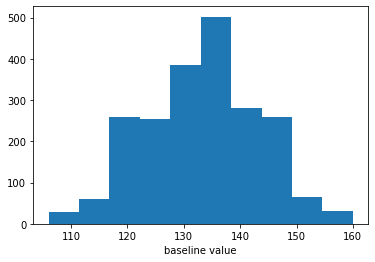

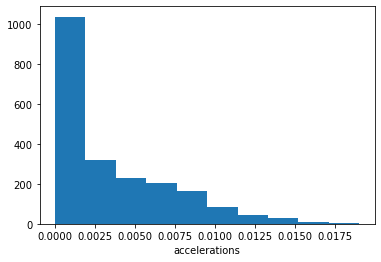

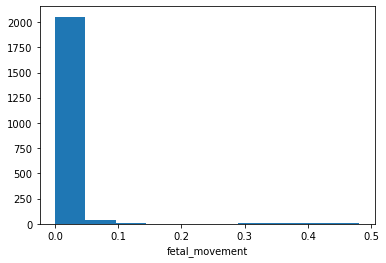

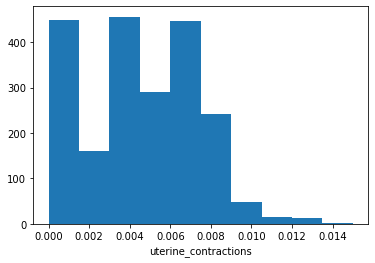

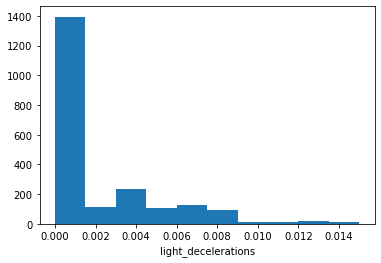

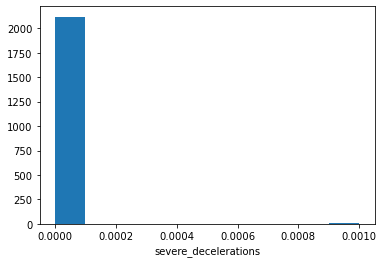

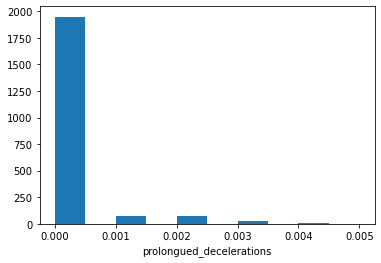

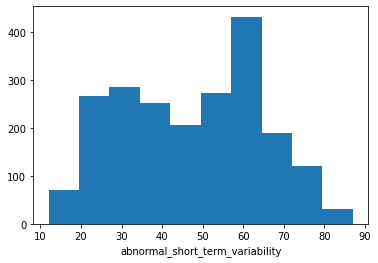

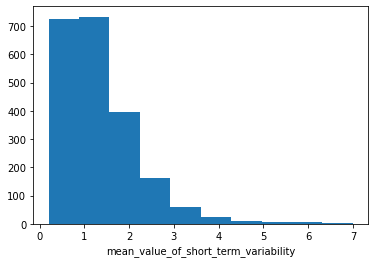

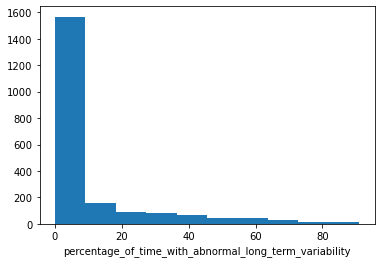

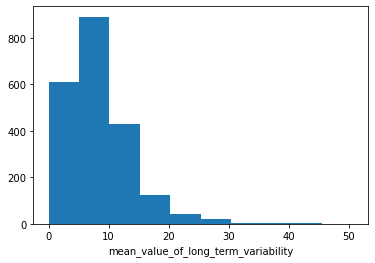

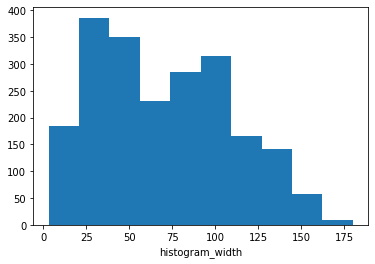

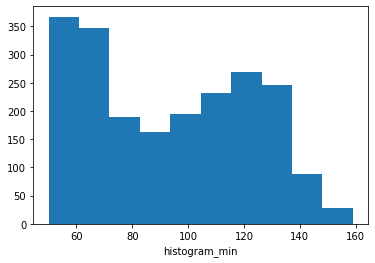

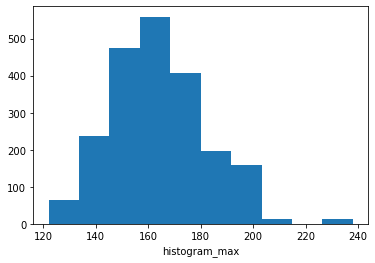

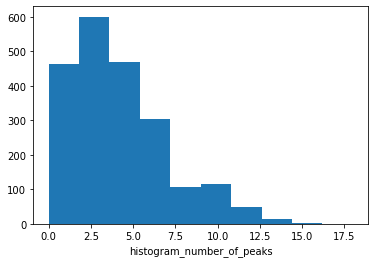

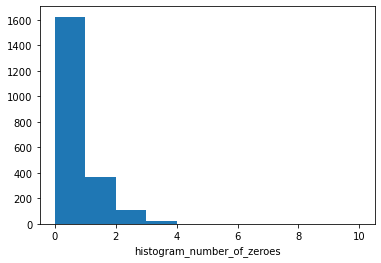

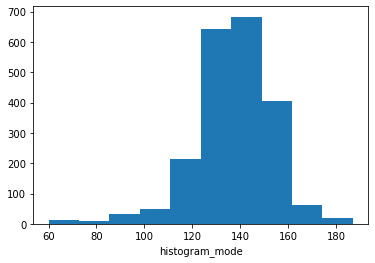

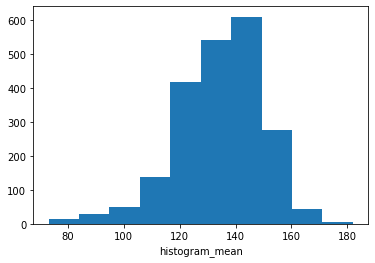

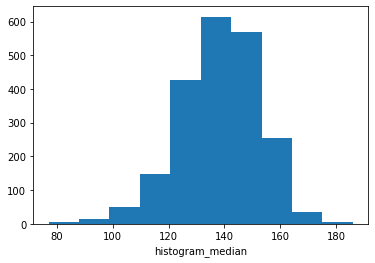

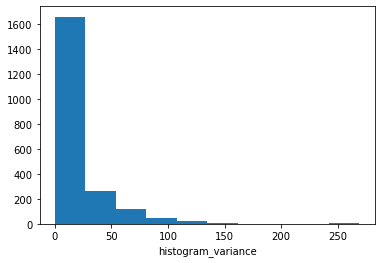

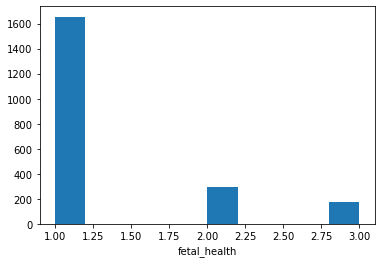

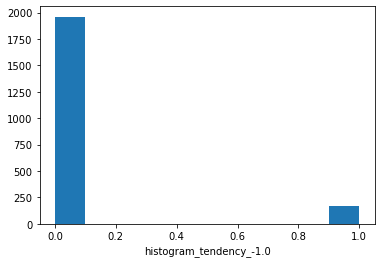

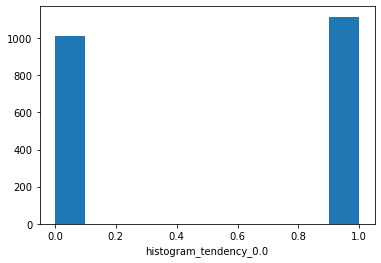

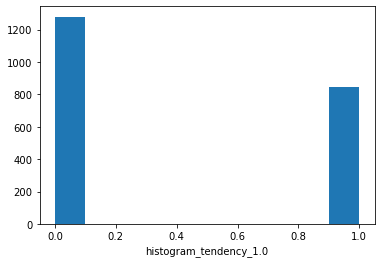

In [12]:
## Now, let's generate some histograms. 

from matplotlib import pyplot as plt

for col in fetal_health.columns:
    plt.hist(fetal_health[col])
    plt.xlabel(col)
    plt.show()
    

In [21]:
## And, we can make some tables

group_means = fetal_health.groupby('fetal_health').mean()

for col in fetal_health.columns:
    print("***********")
    print("Table for " + col)
    if col != "fetal_health":
        if len(pd.value_counts(fetal_health[col])) < 4: #frequencies are meaningful
            print(pd.crosstab(fetal_health[col], fetal_health['fetal_health']))
        else:
            print(group_means[col])

## Seems like "normal" tends to have:
# higher values in accelerations, 
# lower values in fetal movement,
# lower prolonged_decelerations
# lower abnormal short_term variability
# Higher long_term_variability

#But a lot of the other tables don't relay big differences
       

***********
Table for baseline value
fetal_health
1.0    131.981873
2.0    141.684746
3.0    131.687500
Name: baseline value, dtype: float64
***********
Table for accelerations
fetal_health
1.0    0.003992
2.0    0.000275
3.0    0.000392
Name: accelerations, dtype: float64
***********
Table for fetal_movement
fetal_health
1.0    0.007963
2.0    0.008332
3.0    0.025676
Name: fetal_movement, dtype: float64
***********
Table for uterine_contractions
fetal_health
1.0    0.004781
2.0    0.002390
3.0    0.003784
Name: uterine_contractions, dtype: float64
***********
Table for light_decelerations
fetal_health
1.0    0.001941
2.0    0.000536
3.0    0.003670
Name: light_decelerations, dtype: float64
***********
Table for severe_decelerations
fetal_health           1.0  2.0  3.0
severe_decelerations                
0.000                 1654  295  170
0.001                    1    0    6
***********
Table for prolongued_decelerations
fetal_health
1.0    0.000051
2.0    0.000095
3.0    0.001273


In [22]:
# Here's a correlation matrix
fetal_health.corr()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,fetal_health,histogram_tendency_-1.0,histogram_tendency_0.0,histogram_tendency_1.0
baseline value,1.000000,-0.080560,-0.033436,-0.146373,-0.159032,-0.053518,-0.104597,0.305570,-0.279607,0.285630,...,-0.113933,-0.004745,0.708993,0.723121,0.789246,-0.133938,0.148151,-0.195685,-0.149227,0.259221
accelerations,-0.080560,1.000000,0.048235,0.089674,-0.108615,-0.043018,-0.127749,-0.279577,0.207170,-0.373943,...,0.190452,-0.006147,0.243610,0.270334,0.272849,0.125704,-0.364066,-0.057959,0.027352,0.003776
fetal_movement,-0.033436,0.048235,1.000000,-0.068779,0.049228,-0.010976,0.265922,-0.103715,0.121314,-0.074096,...,0.164654,-0.017749,-0.061192,-0.089671,-0.072329,0.179340,0.088010,0.018150,-0.017563,0.007998
uterine_contractions,-0.146373,0.089674,-0.068779,1.000000,0.285079,0.006788,0.077036,-0.232811,0.289679,-0.306608,...,0.082693,0.057894,-0.104854,-0.187505,-0.140287,0.238582,-0.204894,0.009873,0.077848,-0.084825
light_decelerations,-0.159032,-0.108615,0.049228,0.285079,1.000000,0.107573,0.225611,-0.119152,0.562170,-0.271282,...,0.397620,0.235296,-0.347233,-0.527354,-0.388586,0.564289,0.058870,0.026872,-0.028882,0.014779
severe_decelerations,-0.053518,-0.043018,-0.010976,0.006788,0.107573,1.000000,0.012395,0.033949,0.034130,-0.030770,...,0.007024,0.043441,-0.215161,-0.158673,-0.160451,0.136421,0.131934,0.136768,-0.060359,-0.013177
prolongued_decelerations,-0.104597,-0.127749,0.265922,0.077036,0.225611,0.012395,1.000000,0.046226,0.267011,-0.137333,...,0.222860,0.056423,-0.436416,-0.488663,-0.444778,0.503301,0.484859,0.240970,0.005202,-0.137027
abnormal_short_term_variability,0.305570,-0.279577,-0.103715,-0.232811,-0.119152,0.033949,0.046226,1.000000,-0.430705,0.459413,...,-0.167561,-0.149296,0.058363,0.074554,0.119960,-0.146434,0.471191,0.100704,-0.100877,0.047876
mean_value_of_short_term_variability,-0.279607,0.207170,0.121314,0.289679,0.562170,0.034130,0.267011,-0.430705,1.000000,-0.470259,...,0.501430,0.266183,-0.307586,-0.445401,-0.336109,0.555852,-0.103382,0.033030,0.045486,-0.064464
percentage_of_time_with_abnormal_long_term_variability,0.285630,-0.373943,-0.074096,-0.306608,-0.271282,-0.030770,-0.137333,0.459413,-0.470259,1.000000,...,-0.279301,-0.121784,0.165211,0.222321,0.186480,-0.281536,0.426146,-0.008669,-0.042658,0.048263
